# Advanced Computational Physics Course
## Tutorial 3
### @SahaAbhisek

# Scipy

In [1]:
!pip install scipy

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
You should consider upgrading via the '/snap/jupyter/6/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## Basic

## Optimization

Minimize $f(x) = (x-3)^2$

In [3]:
from scipy.optimize import minimize

In [4]:
def f(x):
    return (x-3)**2

f(5)

4

In [5]:
res = minimize(lambda x: (x-3)**2, x0=1)
res.x

array([2.99999998])

In [6]:
func = lambda x: (x-3)**2
func(4)

1

Minimize $f(x, y) = (x-1)^2 + (y-2.5)^2$ subject to<br>
        $ x-2y+2\ge 0 $,<br>
        $ -x-2y+6\ge 0 $,<br>
        $ -x+2y+2\ge 0 $,<br>
        $ x\ge 0$,<br>
        $ y\ge 0$


- 2D function takes in vector $x$
- Constraints must be specified as $g_i(x) \geq 0$
- Bounds specified as rectangular

In [11]:
func = lambda x: (x[0]-1)**2 + (x[1]-2.5)**2

In [12]:
const = [{'type':'ineq', 'fun':lambda x: x[0] - 2* x[1] + 2},
        {'type':'ineq', 'fun':lambda x: -x[0] - 2* x[1] + 6},
        {'type':'ineq', 'fun':lambda x: -x[0] + 2* x[1] + 2}]

bounds = [(0,None), (0,None)]

res = minimize(func, x0=(1,1), constraints=const, bounds=bounds)
res

     fun: 0.7999999999999992
     jac: array([ 0.8       , -1.60000001])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.39999999, 1.7       ])

In [13]:
res.x

array([1.39999999, 1.7       ])

In [18]:
res

     fun: 0.7999999999999992
     jac: array([ 0.8       , -1.60000001])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.39999999, 1.7       ])

In [21]:
func(res.x.tolist())       # converting res.x into a list as func takes list as argument

0.7999999999999992

## Interpolation

$ f(x)=x^{2}sin(x) $ 

0<x<10

In [22]:
def f(x):
    return x**2 * np.sin(x)

In [23]:
from scipy.interpolate import interp1d

In [24]:
x = np.linspace(0,10,10)
y = f(x)


In [25]:
func = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0,10,100)
y_dense = func(x_dense)

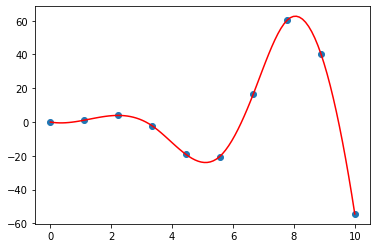

In [26]:
plt.scatter(x,y)
plt.plot(x_dense, y_dense, 'r-')

## Curve Fitting

In [27]:
# 3x**2 + 2

In [28]:
from scipy.optimize import curve_fit

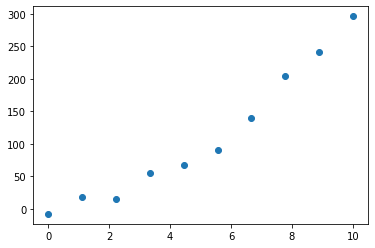

In [29]:
x = np.linspace(0,10, 10)
y = 3*x**2 +2 + 15*np.random.randn(len(x))
plt.scatter(x,y)

In [30]:
def f(x,a,b):
    return a*x**2 + b

In [31]:
popt, pcov = curve_fit(f, x, y, p0=(1,1))

In [32]:
a, b = popt

In [33]:
popt

array([2.97940013, 7.36492208])

In [34]:
x_dense = np.linspace(0,10,100)
y_dense = f(x_dense, a, b )

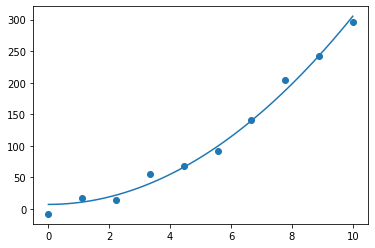

In [35]:
plt.scatter(x,y)
plt.plot(x_dense, y_dense)


The equation for spring motion is $y(t) = A\cos(\omega t+\phi)$. Want to find the natural frequency of oscillation $\omega$ for the spring. You collect the data

$ y(t)= A cos(\omega t +\phi) $<br>
T = 2, f = 1/T=1/2, $\omega = 2\pi f = \pi $ <br>
A = 4 <br>
$\phi = 0 $


In [36]:
t_data = np.linspace(0,10,30)
y_data = 4*np.cos(np.pi*t_data+0.1) + 0.5*np.random.randn(len(t_data))

In [37]:
t_data

array([ 0.        ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])

In [38]:
y_data

array([ 3.54582868,  0.98318142, -1.98128192, -4.19051801, -1.29760095,
        3.5442863 ,  3.75741007,  0.75033725, -3.47705006, -3.2964412 ,
       -0.47055828,  2.64056557,  3.4099874 , -0.36008537, -3.61973238,
       -2.95654601,  0.51381128,  3.7226016 ,  3.12749   , -1.70269646,
       -4.07657023, -2.84624404,  2.10489444,  4.06874877,  2.57984334,
       -1.84180377, -3.11078251, -2.59152136,  2.17715198,  4.41421076])

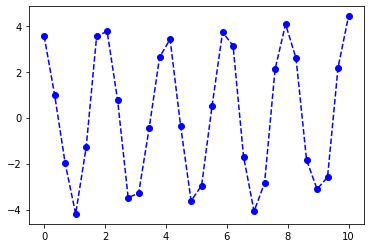

In [39]:
plt.plot(t_data, y_data, 'bo--')

In [40]:
def f(x, A, w, phi):
    return A*np.cos(w*x + phi)

In [41]:
popt, pcov = curve_fit(f, t_data, y_data, p0=(4, np.pi, 0))
A, w, phi = popt

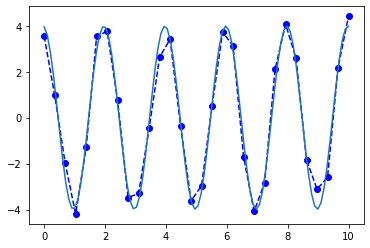

In [42]:
t = np.linspace(0,10,100)
y = f(t, A, w, phi)
plt.plot(t_data, y_data, 'bo--')
plt.plot(t, y)

In [43]:
np.sqrt(np.diag(pcov))

array([0.10747544, 0.00964956, 0.05551274])

## Special Functions¶
Legendre Polynomials $P_l(x)$: satisfy $(1-x^2)y'' -2xy'+l(l+1)y = 0$

- The angular component of the spherical Schrodinger Equation which permits non-infinite solutions

In [44]:
from scipy.special import legendre

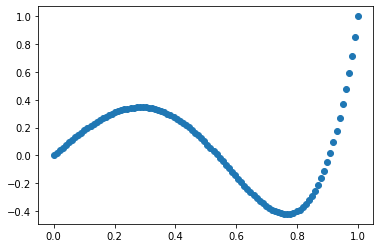

In [45]:
x = np.linspace(0,1,100)
plt.scatter(x, legendre(5)(x))


Bessel functions $J_{\alpha}(x)$: satisfy $x^2 y'' + xy' + (x^2-\alpha^2)y = 0$

- Laplace's Equation in Polar Coordinates

In [46]:
from scipy.special import jv

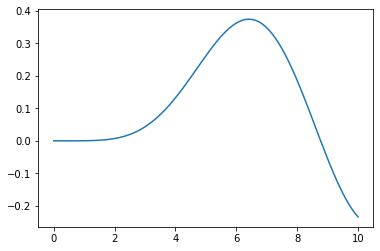

In [47]:
x = np.linspace(0,10,100)
plt.plot(x, jv(5,x))

## Calculus 
## Differentiation

$ x^2  sin(2x) e^{-x}$

In [48]:
from scipy.misc import derivative

In [49]:
x= np.linspace(0,10,100)
def f(x):
    return x**2*np.sin(2*x)*np.exp(-x)


y = f(x)
y1 = derivative(f, x, dx=1e-06, n=1)
y2 = derivative(f, x, dx=1e-06, n=2)

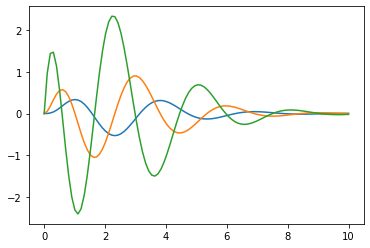

In [50]:
plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)

## Integration
Single integrals

### Example 1:
$$ \int_0^{1} ax^{2}+b dx $$ a=2,b=1

In [51]:
from scipy.integrate import quad

In [52]:
quad(lambda x: 2*x**2 + 1, 0, 1)

(1.6666666666666667, 1.8503717077085944e-14)

### Example 2:
$$ \int_0^{1} x^2 \sin(2x) e^{-x} dx $$

In [53]:
quad(lambda x: x**2*np.sin(2*x)*np.exp(-x), 0,1)

(0.14558175869954834, 1.6162822047366225e-15)

### Example 3:

<img src="images/int.jpg" width="500" height="200">

In [54]:
#Try Yourself

## Double integrals

### Exapmle 1:
$$ \int_{y=0}^{1/2}\int_{x=0}^{1-2y}xy\, dxdy \,\,=\frac{1}{96}$$

In [55]:
from scipy.integrate import dblquad

In [56]:
dblquad(lambda x,y: x*y, 0, 1/2, lambda y:0, lambda y:1-2*y)

(0.010416666666666668, 4.101620128472366e-16)

In [57]:
1/96

0.010416666666666666

### Example 2:

$$ \int_{0}^{1} \int_{-x}^{x^2} \sin(x+y^2) dy dx $$

In [58]:
integrand = lambda y,x: np.sin(x + y**2)

low_y = lambda x: -x
upp_y = lambda x: x**2

integral, integral_error = dblquad(integrand, 0, 1, low_y, upp_y)

In [59]:
integral

0.590090324408853

In [60]:
integral_error

2.0545915475811425e-14

## Differetial Equations
### First Order ODEs

Air friction while falling

$$ v' - \alpha v^2 + \beta = 0 \hspace{10mm} v(0) = 0$$
$$ \alpha =3, \beta=5 $$

solve:
$$ v' = dv/dt =  \alpha v^2 - \beta $$
$$ v = \int (\alpha v^2 - \beta) dt $$

In [61]:
from scipy.integrate import odeint

In [62]:
def dvdt(v,t):
    return 3*v**2 - 5

In [63]:
t = np.linspace(0,1,100)
res = odeint(dvdt, 0, t)

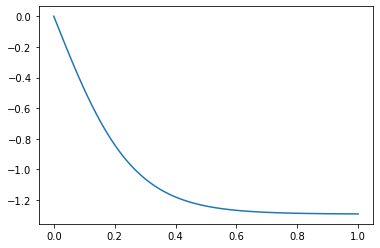

In [64]:
plt.plot(t,res.T[0])

In [65]:
def dvdt(v,t):
    return 3*v**2 - 5

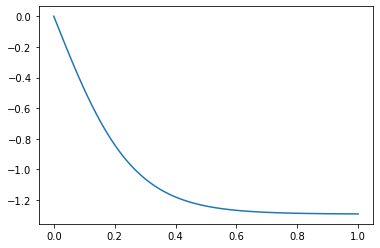

In [66]:
v0 = 0
t = np.linspace(0,1,100)
res = odeint(dvdt, v0, t)
plt.plot(t, res.T[0])


### Coupled first order ODEs

$$ y_1' = y_1 + y_2^2 + 3x \hspace{10mm} y_1(0)=0$$$$ y_2' = 3y_1 + y_2^3 - \cos(x) \hspace{10mm} y_2(0)=0$$
Letting $S=(y_1, y_2)$ we need to write a function that returns $dS/dx = (dy_1/dx, dy_2/dx)$. The function $dS/dx$ can take in $S=(y_1, y_2)$ and $x$

In [67]:
def dsdt(S, x):
    y1, y2 = S
    return [y1 + y2**2 + 3*x, 3*y1 + y2**3 - np.cos(x)]

In [68]:
x = np.linspace(0,1,100)
y1_0 = 0
y2_0 = 0
S0 = (y1_0, y2_0)

res = odeint(dsdt, S0, x)

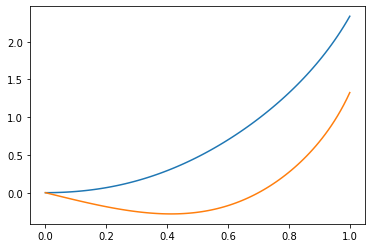

In [69]:
plt.plot(x,res.T[0])
plt.plot(x,res.T[1])


### Second Order ODEs

#### Equation for a pendulum

$$\theta'' - \sin(\theta) = 0$$
Scipy can only solve coupled first order ODEs, but any second order ODE can be turned into two coupled first order ODEs. The same thing goes for higher order ODEs.

Define $\omega = d\theta/dt$ so that one has the following coupled ODEs

$$d \omega / dt = \sin(\theta)$$$$d \theta / dt = \omega $$
Let $S = (\theta, \omega)$,    $\; 0<t<20 $

In [70]:
def dsdt(S, t):
    theta, w = S
    return [w, np.sin(theta)]

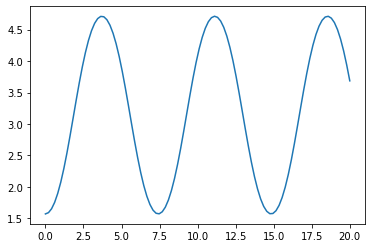

In [71]:
t = np.linspace(0,20,100)
w0 = 0
theta0 = np.pi/2
S0 = [theta0, w0]
res = odeint(dsdt, S0, t)
plt.plot(t, res.T[0])


## Fourier Transforms
The discrete Fourier transform is defined as

$$y[k] = \sum_{n=0}^{N-1} e^{-2 \pi i n (k / N)} x[n] $$
- $k/N$ represents a specific frequency (dimensionless)
- can be converted to a frequency (Hz) if you know the spacing in $x$

In [72]:
from scipy.fft import fft, ifft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)

yinv = ifft(y)
y,yinv

(array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
        -1.83155948+1.60822041j, -1.83155948-1.60822041j,
         2.08155948+1.65109876j]),
 array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j]))

In [73]:
np.sum(x)

4.5

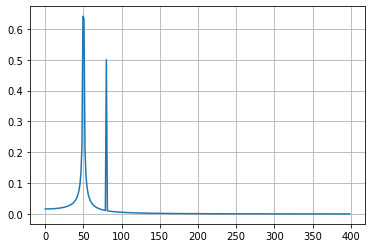

In [74]:
from scipy.fft import fft, fftfreq
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

In [75]:
from scipy.fft import fft, fftfreq

In [76]:
t = np.linspace(0, 10*np.pi, 100)
x = np.sin(2*np.pi*t) + np.sin(4*np.pi*t) + 0.1*np.random.randn(len(t))

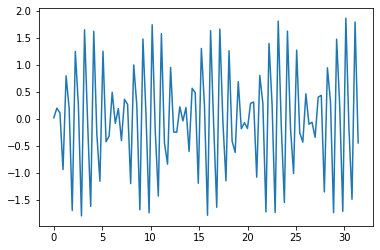

In [77]:
plt.plot(t,x)

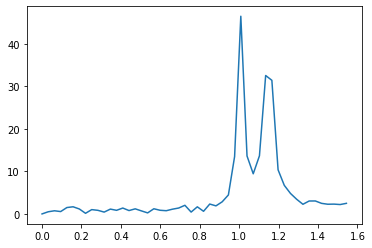

In [78]:
N = len(x)
y = fft(x)[:N//2]
f = fftfreq(N, np.diff(t)[0])[:N//2]

plt.plot(f, np.abs(y))